Import Packages

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
from PIL import Image

# File and directory operations
import os

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning framework
import tensorflow as tf

# Image preprocessing
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Neural network layers and models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Optimizers for training
from tensorflow.keras.optimizers import RMSprop

# Callbacks during training
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, EarlyStopping, History

# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Converting categorical labels to one-hot encoding
from keras.utils import to_categorical

# Pre-trained deep learning models
from tensorflow.keras.applications import VGG16

# Metrics for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, f1_score


/Users/evemcaleer/opt/miniconda3/envs/eve/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Load and Preprocess Data

In [23]:
# Load CSV file
data_df = pd.read_csv('Butterfly_Identification/Training_set.csv')

# Define image directory
image_dir = 'Butterfly_Identification/train'

# Read and preprocess image data
X = []
for filename in data_df['filename']:
    img = load_img(os.path.join(image_dir, filename), target_size=(150, 150))
    img_array = img_to_array(img)
    img_array /= 255.0  # Rescale pixel values to [0, 1]
    X.append(img_array)
X = np.array(X)

# Define image parameters
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 10

Data Exploration

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  6499 non-null   object
 1   label     6499 non-null   object
dtypes: object(2)
memory usage: 101.7+ KB
None

Class Distribution:
MOURNING CLOAK    131
SLEEPY ORANGE     107
ATALA             100
BROWN SIPROETA     99
CRECENT            97
                 ... 
AMERICAN SNOOT     74
GOLD BANDED        73
MALACHITE          73
CRIMSON PATCH      72
WOOD SATYR         71
Name: label, Length: 75, dtype: int64

Missing Values:
filename    0
label       0
dtype: int64


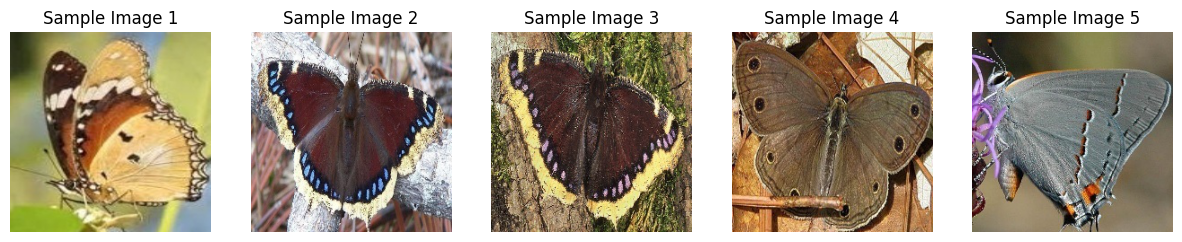

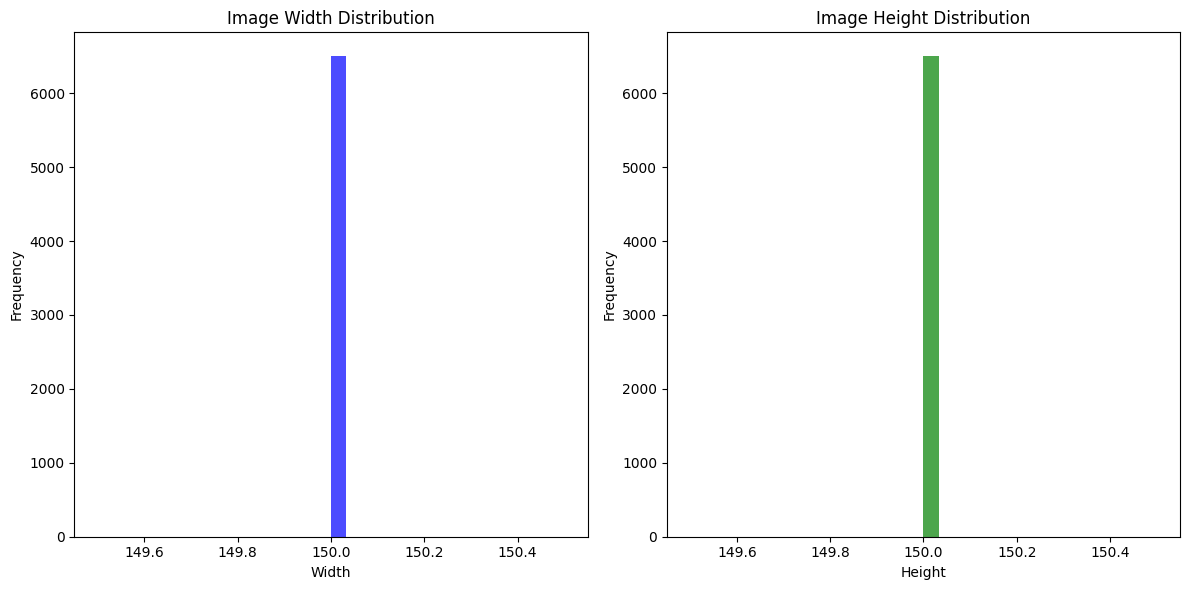

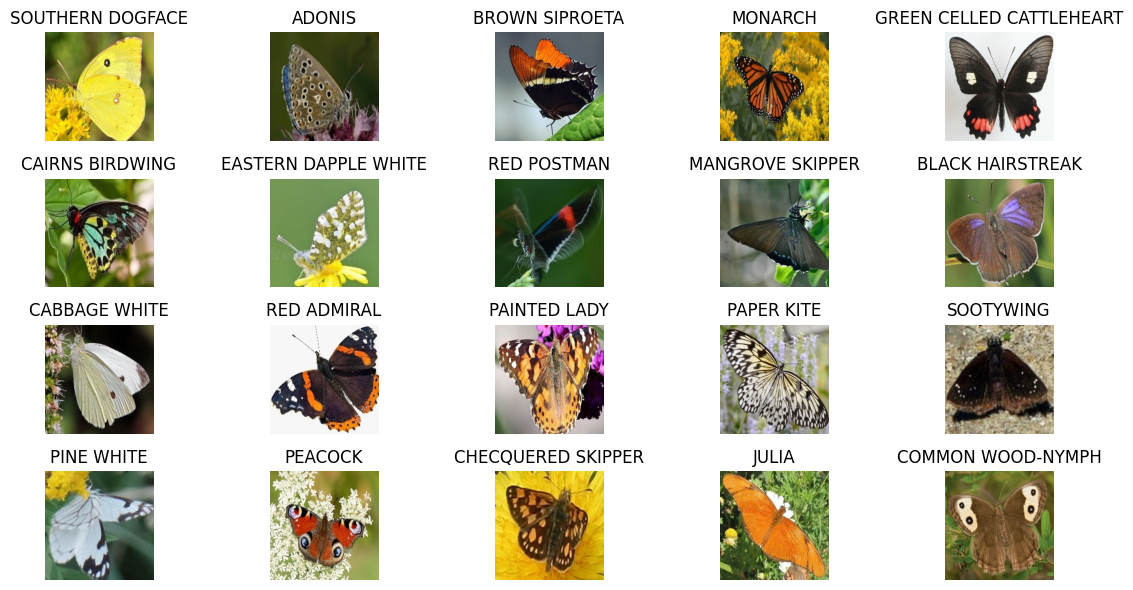

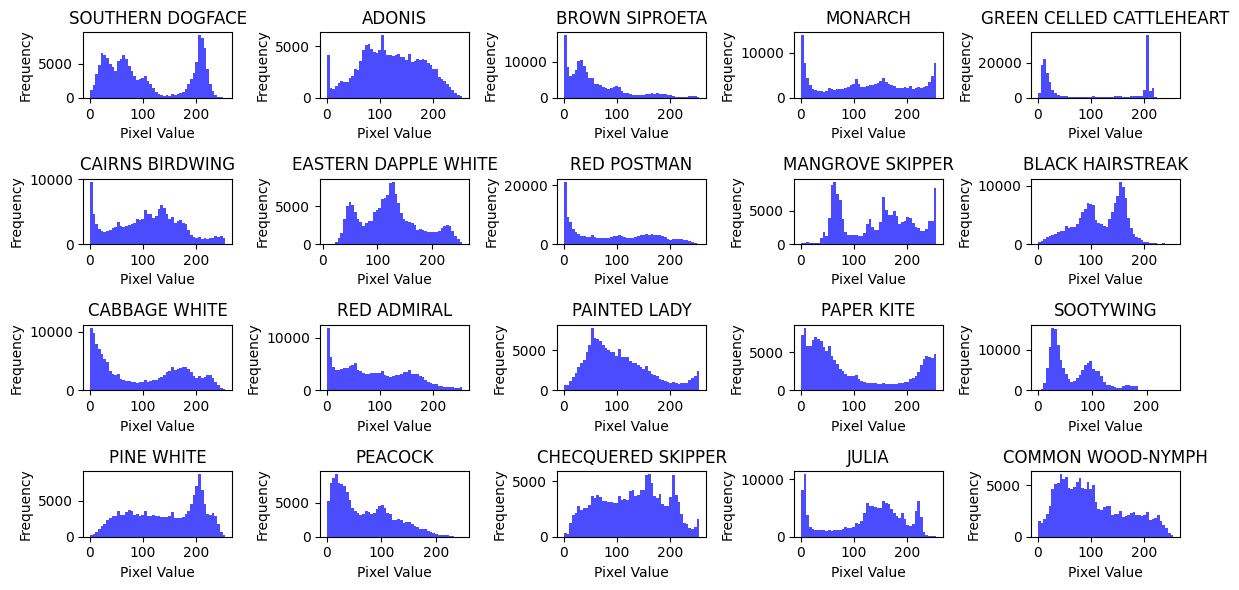

In [24]:
#Looking at the labels:


# Data Summary
print("Data Summary:")
print(data_df.info())

# Class Distribution
class_distribution = data_df['label'].value_counts()
print("\nClass Distribution:")
print(class_distribution)

# Missing Values
missing_values = data_df.isnull().sum()
print("\nMissing Values:")
print(missing_values)
###########################################

#Dislplaying a sample of some images

# Visualize Sample Images
def plot_sample_images(image_dir, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i, img_file in enumerate(os.listdir(image_dir)[:num_samples]):
        img = Image.open(os.path.join(image_dir, img_file))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Sample Image {i+1}')
    plt.show()


# Call function to visualize sample images
plot_sample_images(image_dir)
###########################################

#Plotting image width and height

# Calculate image width and height from the images
image_widths = [image.shape[1] for image in X]
image_heights = [image.shape[0] for image in X]

# Plot histograms of image width and height
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(image_widths, bins=30, color='blue', alpha=0.7)
plt.title('Image Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(image_heights, bins=30, color='green', alpha=0.7)
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

###########################################
# Class visualisation (sample as all 75 are too difficult to see)

# Determine a sample of class labels
num_classes = min(len(data_df['label'].unique()), 20)

# Calculate the number of rows and columns for subplots
num_rows = (num_classes - 1) // 5 + 1  # 5 columns per row
num_cols = min(num_classes, 5)

# Plot class-wise samples
plt.figure(figsize=(12, 6))
for i, class_label in enumerate(data_df['label'].unique()):
    if i < num_classes:
        plt.subplot(num_rows, num_cols, i + 1)
        class_samples = data_df[data_df['label'] == class_label].sample(1)
        img = load_img(os.path.join(image_dir, class_samples['filename'].values[0]))
        plt.imshow(img)
        plt.title(class_label)
        plt.axis('off')

plt.tight_layout()
plt.show()
###########################################
# Plotting colour distribution of sample image

plt.figure(figsize=(12, 6))
for i, class_label in enumerate(data_df['label'].unique()):
    if i < num_classes:
        plt.subplot(num_rows, num_cols, i + 1)
        class_samples = data_df[data_df['label'] == class_label].sample(1)
        img = load_img(os.path.join(image_dir, class_samples['filename'].values[0]))
        img_array = img_to_array(img)
        plt.hist(img_array.flatten(), bins=50, color='blue', alpha=0.7)
        plt.title(class_label)
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Splitting 

In [ ]:

# Split data into images and labels
y = data_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit label encoder on all labels
label_encoder.fit(y_train)

# Encode training and testing labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to categorical format
num_classes = len(label_encoder.classes_)
y_train_categorical = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)


Building the Model

In [ ]:
def build_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False  # Freeze the weights of the pre-trained layers
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

#Defining parameters
img_width, img_height = 150, 150

input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 10

# Build the model
model = build_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Fitting and Evaluating the Model

In [ ]:
# Train the model with callbacks and record history
history = model.fit(X_train, y_train_categorical,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test_categorical),
                    callbacks=[reduce_lr, early_stopping])

# Evaluate the model on the testing data
scores = model.evaluate(X_test, y_test_categorical)
print("Test Accuracy: %.2f%%" % (scores[1] * 100))


Visualising the Model

In [ ]:
model.summary()

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot convergence using difference between training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss Convergence')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Visualising Confusion/Heatmap (Too many classes to understand visuals)

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate class-wise F1-score
class_f1_scores = f1_score(y_test_encoded, y_pred, average=None)

# Plot heatmap of class-wise F1-score
plt.figure(figsize=(12, 6))
sns.heatmap(class_f1_scores.reshape(1, -1), annot=True, cmap='YlGnBu', xticklabels=label_encoder.classes_, yticklabels=['F1-score'], cbar=False)
plt.title('Class-wise F1-score')
plt.xlabel('Class')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()

Visualising Confusion/Heatmap (Using small sample group which can be adjusted)

In [ ]:
# Select random samples from the test set
sample_indices = random.sample(range(len(X_test)), 5)
sample_X_test = X_test[sample_indices]
sample_y_test_encoded = y_test_encoded[sample_indices]

# Predict class probabilities for the selected samples
sample_predictions = model.predict(sample_X_test)
sample_predicted_labels = np.argmax(sample_predictions, axis=1)

# Plot the sample images along with predicted and true labels
plt.figure(figsize=(15, 7))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {label_encoder.classes_[sample_y_test_encoded[i]]}\nPredicted: {label_encoder.classes_[sample_predicted_labels[i]]}\nProb: {sample_predictions[i][sample_predicted_labels[i]]:.2f}")
    plt.axis('off')
plt.show()

# Predict class probabilities for the sample
sample_y_pred_prob = model.predict(sample_X_test)
sample_y_pred = np.argmax(sample_y_pred_prob, axis=1)


# Generate a confusion matrix
conf_matrix = confusion_matrix(sample_y_test_encoded, sample_y_pred)

# Generate a heatmap of the confusion matrix for the sample
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_[sample_y_test_encoded], yticklabels=label_encoder.classes_[sample_y_test_encoded])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Sample)')
plt.show()

# Generate a classification report for the sample
print(classification_report(sample_y_test_encoded, sample_y_pred, target_names=label_encoder.classes_[sample_y_test_encoded]))
